In [1]:
import numpy as np
import scipy.io as sio
import h5py
import tensorflow as tf
import pickle
import os
from matplotlib import pyplot as plt
import importlib
import inspect
from copy import deepcopy
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys

log_dir = '/Users/svd/data/scratch'
ln_directory = log_dir + '/ex-lnfit'
if not os.path.exists(ln_directory):
    os.makedirs(ln_directory)

In [2]:
import ln
import cnn
import ln_fit

Parameters

In [3]:
time_win_sec = 0.1
sr_Hz = 100
P = {}
P['rank'] = 1
P['act'] = 'relu'

Create features

In [4]:
# features
n_feats = 10
n_stim = 600
n_tps_per_stim = 100
feat_dims = [n_stim, n_tps_per_stim, n_feats]
F = np.random.randn(feat_dims[0], feat_dims[1], feat_dims[2])

Create STRF and sample data

Loc 0
Loc conv
norm
seed for kern 0 : 82439920
(10, 10, 1)
norm
seed: 291864693
(1, 1, 1)
Loc 1
Loc 2
Loc 3
Loc 4
Initialize session
Initialize variables
Initialize saver


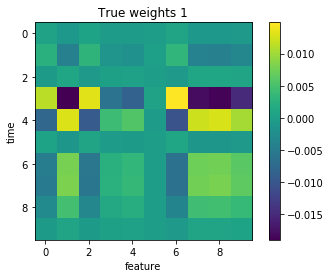

In [5]:
layers = []

# convolutional layer
layer = {}
layer['type'] = 'conv'
layer['time_win_sec'] = time_win_sec
layer['act'] = P['act']
layer['n_kern'] = 1
layer['rank'] = P['rank']
layers.append(layer)

# create network
net1_seed = 2
n_resp = 1
data_dims = [n_stim, n_tps_per_stim, n_resp]
tf.reset_default_graph()
net1 = cnn.Net(data_dims, n_feats, sr_Hz, deepcopy(layers), seed=net1_seed, log_dir=log_dir)
net1.build()
D = net1.predict(F)

# True STRFs
net1_layer_vals = net1.layer_vals()
plt.imshow(net1_layer_vals[0]['W'][:,:,0], interpolation='none')
plt.ylabel('time'); plt.xlabel('feature')
plt.title('True weights 1')
plt.colorbar()
plt.show()

Fit LN model

In [6]:
batch_size=20
train_test_folds=np.zeros(600)
train_test_folds[500:550]=1
train_test_folds[550:600]=2
n_iter=100
step_size=0.01
rank = 1  # none
time_win=10
layer1_scale=0.01
nonlin='relu'
print_iterations=True
l2_penalty=0
directory_to_save=log_dir
fname_flag='LN'
overwrite=True
fix_bias=None
early_stopping=True
optimizer='adam'
momentum=0.9
use_nesterov=False
Z = ln_fit.onelayer(F, D, batch_size, train_test_folds, n_iter, step_size, rank=rank, time_win=time_win,
             layer1_scale=layer1_scale, nonlin='relu', print_iterations=True,
             l2_penalty=1, directory_to_save=log_dir, fname_flag='LN', overwrite=overwrite,
             fix_bias=None, early_stopping=True, optimizer='adam', momentum=0.9, use_nesterov=False)



0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


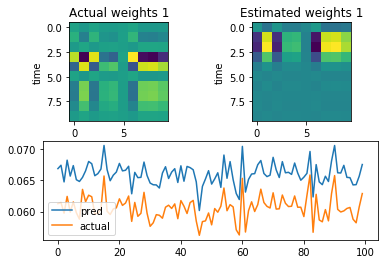

In [12]:
W=Z['W']
plt.subplot(2,2,1)
plt.imshow(net1_layer_vals[0]['W'][:,:,0], interpolation='none')
plt.ylabel('time'); plt.xlabel('feature')
plt.title('Actual weights 1')
plt.subplot(2,2,2)
plt.imshow(W[:,:,0], interpolation='none')
plt.ylabel('time'); plt.xlabel('feature')
plt.title('Estimated weights 1')
plt.subplot(2,1,2)
plt.plot(Z['P'][:100,0,0])
plt.plot(D[:100,0,0])
plt.legend(('pred','actual'))
plt.show()

In [8]:
net1.layers

[{'W': <tf.Tensor 'concat:0' shape=(10, 10, 1) dtype=float32>,
  'Y': <tf.Tensor 'Relu:0' shape=(?, 105, 1) dtype=float32>,
  'act': 'relu',
  'b': <tf.Tensor 'Abs:0' shape=(1, 1, 1) dtype=float32>,
  'n_kern': 1,
  'rank': 1,
  'time_win_sec': 0.1,
  'time_win_smp': 10,
  'type': 'conv'}]

In [9]:
Z['b']

array([ 0.06589388], dtype=float32)

In [10]:
importlib.reload(ln)
P['max_iter'] = 100
P['learning_rate'] = 0.01
S = ln.fit(F, D, sr_Hz, time_win_sec, O=P, overwrite=False, log_dir=ln_directory, sort_weights_PC1=True)

NameError: name 'misc' is not defined

In [69]:
for k in Z.keys():
    if type(Z[k]) is str:
        print('{}: {}'.format(k,Z[k]))
    else:
        print('{}: {}'.format(k,Z[k].shape))

test_loss: (100, 1)
P: (300, 100, 1)
W: (10, 20, 1)
b: (1,)
train_loss: (100, 1)
penalized_train_loss: (100, 1)
fname: /Users/svd/data/scratch/LN-iter100-timewin10-step0.01-scale0.01-nonlin-relu-l2penalty1-rank1-earlystopTrue.p
idstring: iter100-timewin10-step0.01-scale0.01-nonlin-relu-l2penalty1-rank1-earlystopTrue
